<a href="https://colab.research.google.com/github/cmrondon2000/optimizacion_aeroportuaria/blob/main/optimizacion_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

datos = pd.read_csv("/content/flights.csv")
datos.shape

(71175, 11)

In [2]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [5]:
datos.describe(include='object')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


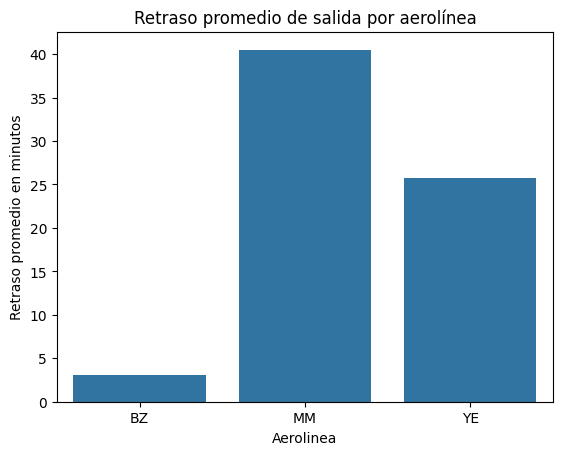

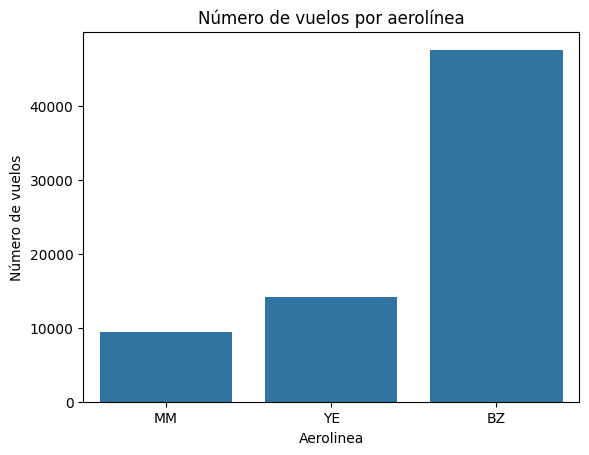

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Retraso promedio de salida por aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(x='airline', data=datos)
plt.title('Número de vuelos por aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Número de vuelos')
plt.show()

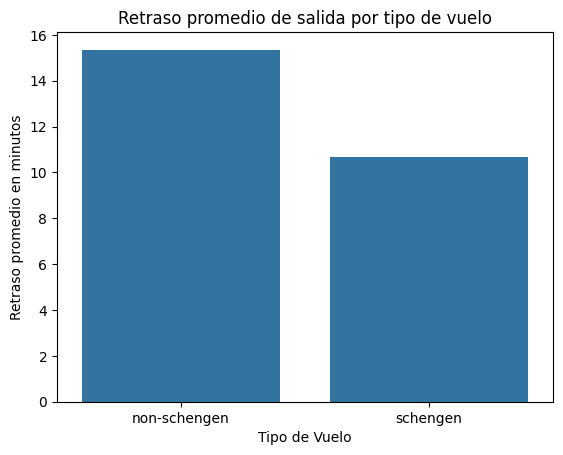

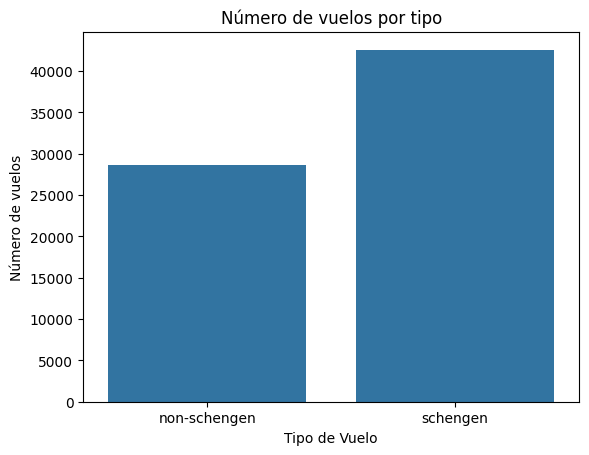

In [7]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Retraso promedio de salida por tipo de vuelo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Retraso promedio en minutos')
plt.show()

sns.countplot(x='schengen', data=datos)
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de vuelos')
plt.show()

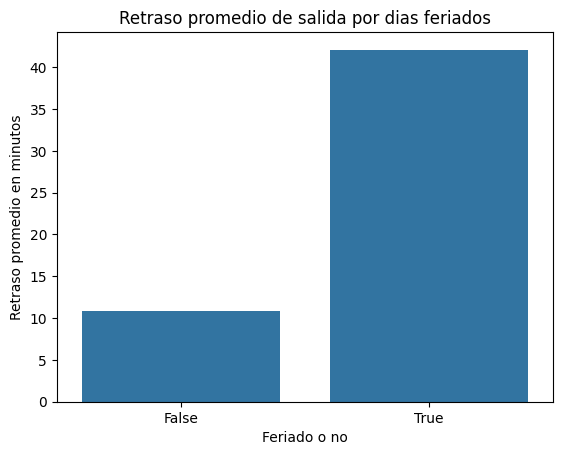

In [8]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Retraso promedio de salida por dias feriados')
plt.xlabel('Feriado o no')
plt.ylabel('Retraso promedio en minutos')
plt.show()




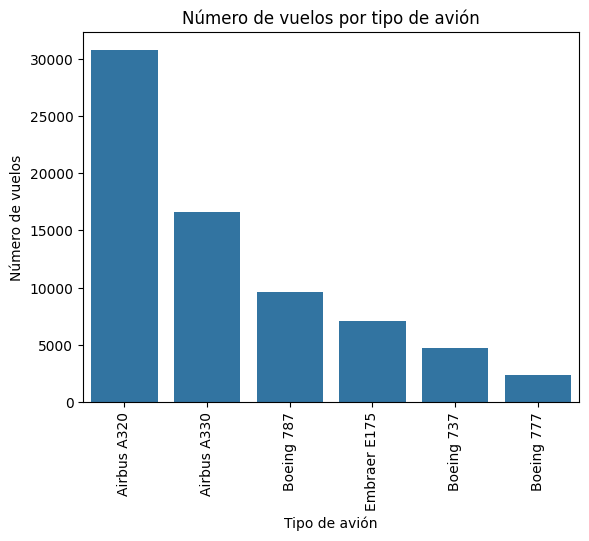

In [9]:
order = datos["aircraft_type"].value_counts().index
sns.countplot(x='aircraft_type', data=datos, order=order)
plt.title('Número de vuelos por tipo de avión')
plt.xticks(rotation = 90)
plt.xlabel('Tipo de avión')
plt.ylabel('Número de vuelos')
plt.show()


<Axes: xlabel='arrival_time', ylabel='Count'>

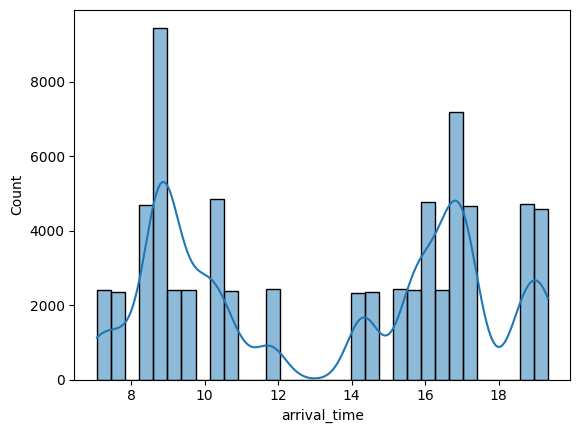

In [10]:
sns.histplot(data = datos, x="arrival_time", kde = True)

In [11]:
# regla de Freedman Diaconis para saber el ancho de los bins de un histograma

import numpy as np

def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho



<Axes: xlabel='arrival_time', ylabel='Count'>

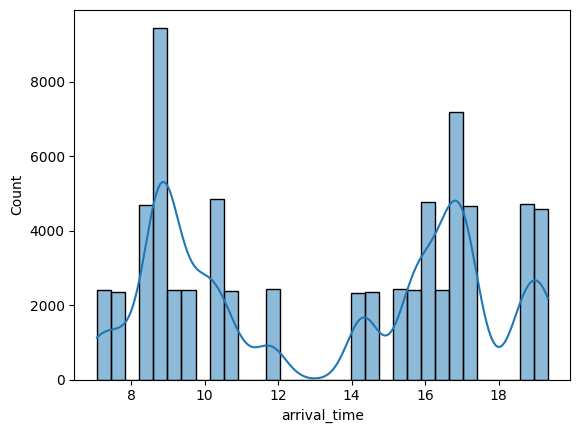

In [12]:
binwidth = ancho_bin(datos,"arrival_time")
sns.histplot(data = datos, x="arrival_time", kde = True, binwidth = binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

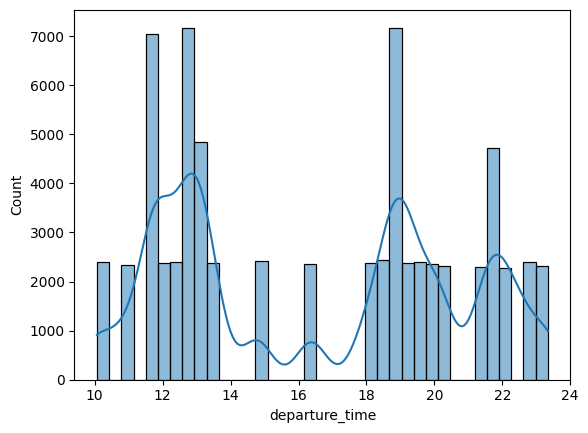

In [13]:
binwidth = ancho_bin(datos,"departure_time")
sns.histplot(data = datos, x="departure_time", kde = True, binwidth = binwidth)

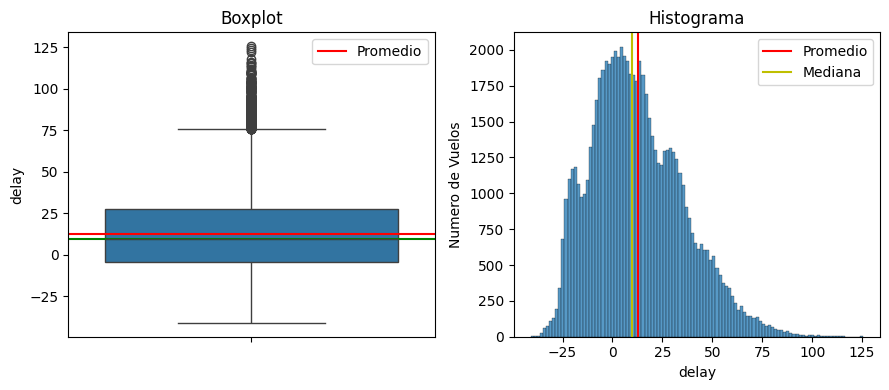

In [14]:
atraso_promedio = datos["delay"].mean()
atraso_mediana = datos["delay"].median()

fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.boxplot(y="delay", data=datos, ax=ax[0])
ax[0].set_title("Boxplot")
ax[0].axhline(y = atraso_promedio, color = "r", linestyle = "-", label = "Promedio")
ax[0].legend()
ax[0].axhline(y = atraso_mediana, color = "g", linestyle = "-")

binwidth = ancho_bin(datos,"delay")
sns.histplot(x="delay", data=datos, ax=ax[1], binwidth = binwidth)
plt.ylabel("Numero de Vuelos")
plt.grid(False)
ax[1].set_title("Histograma")
ax[1].axvline(x = atraso_promedio, color = "r", linestyle = "-", label = "Promedio")
ax[1].axvline(x = atraso_mediana, color = "y", linestyle = "-", label = "Mediana")
ax[1].legend()

plt.tight_layout()

plt.show()

In [15]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [16]:
datos["date"] = datos["year"].astype(str) + "-" + (datos["day"]+1).astype(str)
datos["date"] = pd.to_datetime(datos["date"], format = "%Y-%j")
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [17]:
datos["is_weekend"] = datos["date"].dt.weekday.isin([5,6])
datos["day_name"] = datos["date"].dt.day_name()
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


In [18]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [19]:
datos["schengen"] = datos["schengen"].replace({"non-schengen":0, "schengen":1})
datos["is_holiday"] = datos["is_holiday"].replace({False:0, True:1})
datos["is_weekend"] = datos["is_weekend"].replace({False:0, True:1})
datos.sample(3)

/tmp/ipython-input-1452749141.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos["schengen"] = datos["schengen"].replace({"non-schengen":0, "schengen":1})
/tmp/ipython-input-1452749141.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos["is_holiday"] = datos["is_holiday"].replace({False:0, True:1})
/tmp/ipython-input-1452749141.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
68450,26,MM,Airbus A320,0,TCY,8.885071,10.885071,183,2022,0,30.162680,2022-07-03,1,Sunday
45952,24,BZ,Airbus A320,1,FJB,9.668655,12.668655,143,2018,0,1.078187,2018-05-24,0,Thursday
31710,2,BZ,Airbus A320,1,ZQO,19.196804,22.196804,289,2015,0,-5.880006,2015-10-17,1,Saturday


In [20]:
categoricas = ["airline","aircraft_type","origin","day_name"]

pd.get_dummies(data = datos, columns=categoricas, dtype = int)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1,...,0,1,0,0,0,1,0,0,0,0
71171,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1,...,0,0,0,0,0,1,0,0,0,0
71172,7,1,8.564949,13.564949,364,2022,1,56.167080,2022-12-31,1,...,0,1,0,0,0,1,0,0,0,0
71173,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1,...,0,0,1,0,0,1,0,0,0,0


In [21]:
datos_codificados = pd.get_dummies(data = datos, columns=categoricas, dtype = int)
datos_codificados.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
datos[["arrival_time","departure_time"]].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [23]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [24]:
df = datos_codificados.drop(columns=["flight_id","departure_time","day","year","date"])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
51865,1,14.258911,0,-3.289457,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
54380,1,8.564949,0,16.885173,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
60012,0,16.718722,0,10.637556,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7048,0,17.041281,0,76.775785,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
16594,1,18.635384,0,-24.928126,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9197,1,16.909690,0,11.062797,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
39336,0,8.939996,0,32.888293,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
60762,1,16.245220,0,50.246145,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
6754,0,15.967963,0,-18.439169,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
29474,1,16.245220,0,56.054384,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [25]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(["delay"], axis =1)
y = df["delay"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)


DummyRegressor()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {"RMSE":round(rmse**(1/2),4),"MAE":round(mae,4),"R2":round(r2,4)}
  return metricas




In [32]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regresion(y_test, y_pred):

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse, 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

In [36]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
Raíz del Error Cuadrático Medio: 23.1612
Error Absoluto Medio: 18.5646
R2 Score: -0.0


Estrategia: median
Raíz del Error Cuadrático Medio: 23.3446
Error Absoluto Medio: 18.4452
R2 Score: -0.0159


Estrategia: quantile
Raíz del Error Cuadrático Medio: 28.7554
Error Absoluto Medio: 22.0248
R2 Score: -0.5414


Estrategia: constant
Raíz del Error Cuadrático Medio: 23.3079
Error Absoluto Medio: 18.4449
R2 Score: -0.0127


